In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors as colors
import matplotlib.patches as patches

import math
import json
import numpy as np

import ACClasses


Area_Xenon1t_lid = 48.*48.*np.pi  # cm^2
Area_Xenon1t = Area_Xenon1t_lid + np.pi*2.*48. * 100.

Area_LZPTFE = np.pi*2.*75. * 150. #cm^2

XENONdetector = ACClasses.Detector(TPCHeight=100., 
               TPCRadius = 48.,
               BelowCathodeHeight = 10.,
               FiducialCut = 10.,
               ExtractionEfficiency = 0.96,
               g2 = 11.4,
               SEGain = 20,                                   
               LCETop = 0.32,  # These are guesses to get at g1 of 0.14, and match the relative LCE on the wiki
               LCEBottom = 0.54,
               PMTDetectionProb = 0.3,
               PMTDarkRate = 50,
               DriftField = 150,
               ElectronLifetime = 0.65,
               PMTDensity = 250./Area_Xenon1t_lid
                             )
XENONnTdetector = ACClasses.Detector(TPCHeight=149., 
               TPCRadius = 66.,
               BelowCathodeHeight = 12.,
               FiducialCut = 10.,
               ExtractionEfficiency = 0.96,
               g2 = 16,
               SEGain = 35,
               LCETop = 0.26,
               LCEBottom = 0.44,
               PMTDetectionProb = 0.3,
               PMTDarkRate = 50,
               DriftField = 100, #need to download data for lower drift field
               ElectronLifetime = 8,
               PMTDensity = 250./Area_Xenon1t_lid
                             )

DARWINdetector = ACClasses.Detector(TPCHeight=260., 
               TPCRadius = 130.,
               BelowCathodeHeight = 10.,
               FiducialCut = 10.,
               ExtractionEfficiency = 0.96,
               g2 = 30,
               SEGain = 40,
               LCETop = 0.26,
               LCEBottom = 0.44,
               PMTDetectionProb = 0.32,
               PMTDarkRate = 50,
               DriftField = 200,
               ElectronLifetime = 10,
               PMTDensity = 250./Area_Xenon1t_lid
                    )

detector = DARWINdetector

particleBackgroundsXENON1t = ACClasses.ParticleBackground(
        detector = detector,
        A1_cevns = 915, # NR background's CEvNS two exponentials. These come from a rough fit to the LZ background spectra
        b1_cevns = 0.5, # keV
        A2_cevns = 0.083, # events per (kev tonne year)
        b2_cevns = 16.7, # keV
        A_neutrons_fiducial = 0.005/Area_Xenon1t, # times 1 tonne to remove mass dependence Fig 8 in https://arxiv.org/pdf/1512.07501.pdf
        #A_neutrons_edge = 125 * 2.0/Area_Xenon1t, # times 2 tonnes to remove mass dependence
        A_neutrons_edge = 125 * 2.0/Area_Xenon1t, # times 2 tonnes to remove mass dependence
        b_neutrons = 25., # keV
        FlatERRate_internal = 10.0,  # events per (kev, tonne, year) prediction for nT,  # Rn, Kr - events per (kev tonne year)
        FlatErRate_external = 100./Area_Xenon1t,   #events per (kev * yr* cm^2) (not per mass), only close to the walls in 1-12 keV from 1T; from https://arxiv.org/pdf/1512.07501.pdf
                        )
particleBackgrounds = particleBackgroundsXENON1t
particleBackgrounds.FlatERRate_internal = particleBackgrounds.FlatERRate_internal/100.
particleBackgrounds.FlatErRate_external = particleBackgrounds.FlatErRate_external/100.

''' Assume all neutrons come in from the outside, hence the rate scales with area, not with LXe mass.'''
''' The materials contribution is also approximately flat below 12 keV. This is from MC prediction for 1T,
giving the rate as function of fiducial mass. This is strongly dominated by events near the wall. Since
this bg is thus interacting mostly outside the fiducial volume, we take this rate as what is going on
near the wall. Since the background comes from surrounding stuff, it should scale with wall area. '''

#instrumentalBackgrounds = ACClasses.InstrumentalBackground(
#        detector = detector,
#        A_unexplainedLoneS2 = 0.6/Area_Xenon1t,  # Hz/cm^2; from XENON1T 10.1103/PhysRevLett.123.251801 and 10.1103/PhysRevD.106.022001
#        b_unexplainedLoneS2 = 0.43,  # based on spectrum in above citations and Kopec, A. et al. Correlated single- and few-electron backgrounds milliseconds after interactions in dual-phase liquid xenon time projection chambers. J Instrum 16, P07014,
#        unexplainedLoneS1Rate = 30000./Area_LZPTFE # From https://docs.google.com/presentation/d/1QfHtG9H1M0ypoMsY4n73dK6WjzXPhpFDmVMYRyO-mFI/edit#slide=id.g17b2ed9eb9a_0_0 slide 24
#        )
#instrumentalBackgrounds = ACClasses.InstrumentalBackground(
#        detector = detector,
#        A_unexplainedLoneS2 = .5/Area_Xenon1t,  # Hz/cm^2; to match lone S2 rate reoprted in XENON1T above 8 PE
#       # b_unexplainedLoneS2 = 1.6,  # to match lone S2 spectrum observed in XENON1T
#        b_unexplainedLoneS2 = 1.1,  # to match lone S2 spectrum observed in XENON1T
#        unexplainedLoneS1Rate = 30000./Area_LZPTFE, # # to match the lone S1 rate observed in XENON1T
#        S1MisclassificationProb = 0.01, # Probability to misclassify a signal from SE as an S1
#        #unexplainedLoneS1Rate = 0
#        )
instrumentalBackgrounds1T = ACClasses.InstrumentalBackground(
        detector = detector,
        A_unexplainedLoneS2 = 20.*6e9/Area_Xenon1t/ACClasses.SecondsPerYear,  # /(yr cm^2); to match lone S2 rate reoprted in XENON1T above 8 PE
        b1_unexplainedLoneS2 = 0.3,  # to match lone S2 spectrum observed in XENON1T
        b2_unexplainedLoneS2 = 1.8,  # to match lone S2 spectrum observed in XENON1T
        r_unexplainedLoneS2 = 0.9999,  # to match lone S2 spectrum observed in XENON1T
        c_unexplainedLoneS2 = 20.*450/Area_Xenon1t/ACClasses.SecondsPerYear,  # to match lone S2 spectrum observed in XENON1T
        unexplainedLoneS1Rate = 30000./Area_LZPTFE, # # to match the lone S1 rate observed in XENON1T
        S1MisclassificationProb = 0.00003, # Probability to misclassify a signal from SE as an S1. This is a wild guess
        )
#settings
instrumentalBackgrounds = instrumentalBackgrounds1T

energyRange = 15 # keV
maxS1Range = 250
maxS2Range = 200


#ERChargeYield = 30.      #electrons/keV  #https://link.springer.com/content/pdf/10.1140/epjc/s10052-018-5801-5.pdf
#ERLightYield = 40.       #photons/keV     # also see https://arxiv.org/pdf/1512.07501.pdf
#NRChargeYield = 6.       #electrons/keV   at 5 keV
#NRLightYield = 6.        #photons/keV      at 5 keV https://www.sciencedirect.com/science/article/pii/S0370269311012822,https://arxiv.org/pdf/1512.07501.pdf


the fiducial mass is 33.75 tonnes
		the active mass is 39.60 tonnes
		the below-cathode mass is 1.52 tonnes
		the drift speed is 123.93cm/ms
		the max drift time is 2.10ms
		the number of PMTs is 1833 
		g1 is 0.11


/project/atlas/Users/pkharban/AC_backgrounds_pdfs_Tina/ACClasses.py:521: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_Btime.pcolormesh(X_originalElectrons, Y_driftTime,	Z_ElectronLoss, norm=colors.LogNorm())


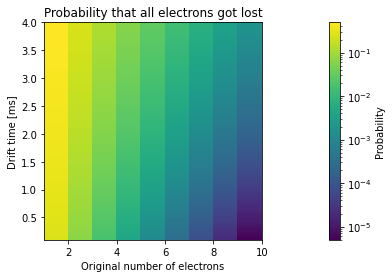

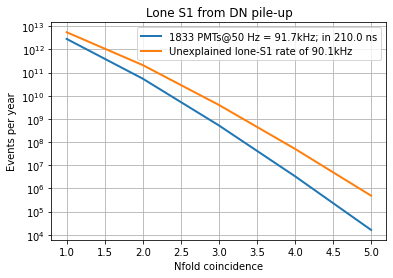

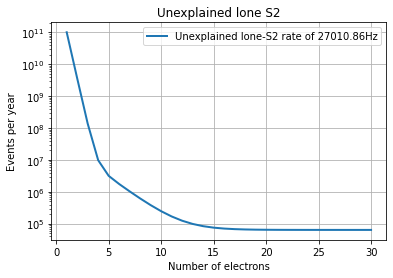

/project/atlas/Users/pkharban/AC_backgrounds_pdfs_Tina/ACClasses.py:569: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_C2.pcolormesh(X_C2, Y_C2,  Z_C2, cmap='plasma')


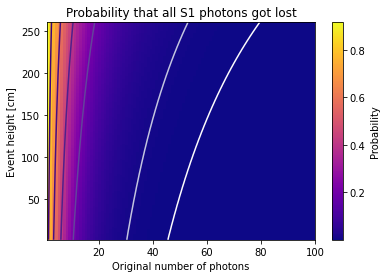

382746.41342221136
66034.55088761736
63900.56493396191
Lone S2 rate above 8 e-: 0.06560091245301015 Hz


In [2]:
print(detector)
instrumentalBackgrounds.PlotElectronLossProbability()
instrumentalBackgrounds.PlotDarkNoiseRate()
instrumentalBackgrounds.PhotonLossProbability()
loneS2perYear = 0.
for i in range(20):
    if i < 8:
        continue
    loneS2perYear = loneS2perYear + instrumentalBackgrounds.RUnexplainedS2(i)
print(instrumentalBackgrounds.RUnexplainedS2(9))
print(instrumentalBackgrounds.RUnexplainedS2(18))
print(instrumentalBackgrounds.RUnexplainedS2(27))
print("Lone S2 rate above 8 e-: " + str(loneS2perYear/ACClasses.SecondsPerYear) + " Hz")

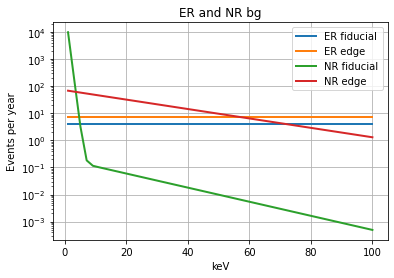

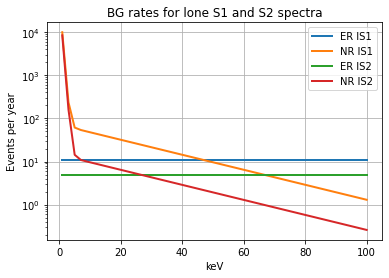

In [3]:
#Particle backgrounds

## In energy space

###This part is just to check that the energy spectra match whatever is expected from simulations
fig_bg, ax_bg = plt.subplots()
x_bg = np.linspace(1, 100, 50) #keV
y_bger_in = particleBackgrounds.BackgroundSpectrum(x_bg, "ER", "internal", detector.activeMass, -1)
y_bger_ex = particleBackgrounds.BackgroundSpectrum(x_bg, "ER", "external", -1, detector.TPCArea)

y_bgnr_in = particleBackgrounds.BackgroundSpectrum(x_bg, "NR", "internal", detector.activeMass, -1)
y_bgnr_ex = particleBackgrounds.BackgroundSpectrum(x_bg, "NR", "external", -1, detector.TPCArea)

ax_bg.semilogy(x_bg, y_bger_in, linewidth=2.0, label="ER fiducial")
ax_bg.semilogy(x_bg, y_bger_ex, linewidth=2.0, label="ER edge")
ax_bg.semilogy(x_bg, y_bgnr_in, linewidth=2.0, label="NR fiducial")
ax_bg.semilogy(x_bg, y_bgnr_ex, linewidth=2.0, label="NR edge")

ax_bg.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=25))
ax_bg.grid()
ax_bg.legend()
ax_bg.set_xlabel("keV")
ax_bg.set_ylabel("Events per year")
ax_bg.set_title("ER and NR bg")
plt.show()

## Now we collect those sources and detector locations that can create LS1 or LS2 signals
### Backgrounds relevant to lone-s1
y_bger_ls1 = particleBackgrounds.BackgroundSpectraForLone(x_bg, "S1", "ER")
y_bgnr_ls1 = particleBackgrounds.BackgroundSpectraForLone(x_bg, "S1", "NR")

### Backgrounds relevant to lone-s2
y_bger_ls2 = particleBackgrounds.BackgroundSpectraForLone(x_bg, "S2", "ER")
y_bgnr_ls2 = particleBackgrounds.BackgroundSpectraForLone(x_bg, "S2", "NR")

fig_bg2, ax_bg2 = plt.subplots()
ax_bg2.semilogy(x_bg, y_bger_ls1, linewidth=2.0, label="ER lS1")
ax_bg2.semilogy(x_bg, y_bgnr_ls1, linewidth=2.0, label="NR lS1")
ax_bg2.semilogy(x_bg, y_bger_ls2, linewidth=2.0, label="ER lS2")
ax_bg2.semilogy(x_bg, y_bgnr_ls2, linewidth=2.0, label="NR lS2")

ax_bg2.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=25))
ax_bg2.grid()
ax_bg2.legend()
ax_bg2.set_xlabel("keV")
ax_bg2.set_ylabel("Events per year")
ax_bg2.set_title("BG rates for lone S1 and S2 spectra")
plt.show()


It may take a moment for the blurring to finish.


/project/atlas/Users/pkharban/AC_backgrounds_pdfs/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


It may take a moment for the blurring to finish.


/project/atlas/Users/pkharban/AC_backgrounds_pdfs/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


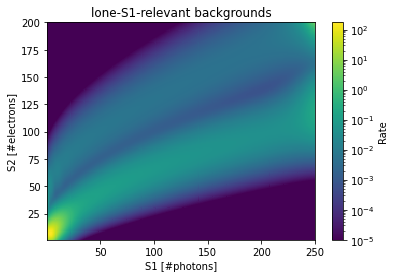

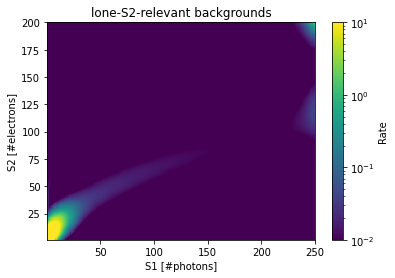

In [4]:
## Now convert those spectra to number-of-quanta space

S1q = []
S2q = []
Rq = []

    
binwidth = 0.25 # keV
''' We want finer binning than 1 keV, otherwise the spectra in 
    S1/S2 are not continuous. 
    '''
x_bg_l = np.linspace(0, energyRange, int(energyRange/binwidth))

#For the lone S1 signals:
def FillMatrix(a, b, c):
    S1q.append(a)
    S2q.append(b)
    Rq.append(c)

    
''' Get the central values for the number of S1 and S2 quanta produced. '''
for x in x_bg_l:
    if x < binwidth:
        continue
    a, b = detector.EnergyToQuanta(x,"ER")
    c = particleBackgrounds.BackgroundSpectraForLone(x, "S1", "ER")
    FillMatrix(a, b, c)
    ''' Due to the quenching, the ER and NR energy to quanta conversion
    is at different scales - at the same energy, NR produce less quanta
    and we have to include higher energies.'''
    a, b = detector.EnergyToQuanta(x*2.,"NR") 
    c = particleBackgrounds.BackgroundSpectraForLone(x*2., "S1", "NR")
    FillMatrix(a, b, c)    
''' Now we apply a gaussian smearing to recreate the statistical fluctuations in the 
    number of quanta produced. This does not take the anti-correlation into account. '''    
S1_forLS1, S2_forLS1, R_forLS1 = ACClasses.GaussianFilterGPT(Rq, S1q, S2q, binwidth, maxS1Range, maxS2Range, 0.2)

''' Make a nice plot '''
X_S1, Y_S2 = np.meshgrid(S1_forLS1, S2_forLS1)  
fig_xx, ax_xx = plt.subplots()    
max_val = np.max(R_forLS1[R_forLS1>0])
im_xx = ax_xx.pcolormesh(S1_forLS1, S2_forLS1, R_forLS1, norm=colors.LogNorm(vmin=1e-5,vmax=max_val))
ax_xx.set_xlabel("S1 [#photons]")
ax_xx.set_ylabel("S2 [#electrons]")
ax_xx.set_title("lone-S1-relevant backgrounds")
fig_xx.colorbar(im_xx, ax=ax_xx, pad=0.05, label="Rate")


S1q_2 = []
S2q_2 = []
Rq_2 = []

def FillMatrix_2(a, b, c):
    S1q_2.append(a)
    S2q_2.append(b)
    Rq_2.append(c)
#For the lone S2 signals:
for x in x_bg_l:
    if x < binwidth:
        continue
    a, b = detector.EnergyToQuanta(x,"ER")
    c = particleBackgrounds.BackgroundSpectraForLone(x, "S2", "ER")
    FillMatrix_2(a, b, c)
    a, b = detector.EnergyToQuanta(x*2.,"NR")
    c = particleBackgrounds.BackgroundSpectraForLone(x*2., "S2", "NR")
    FillMatrix_2(a, b, c) 

S1_forLS2, S2_forLS2, R_forLS2 = ACClasses.GaussianFilterGPT(Rq_2,S1q_2,S2q_2,binwidth, maxS1Range, maxS2Range, 0.2)



fig_xxx, ax_xxx = plt.subplots()   
ax_xxx.set_xlabel("S1 [#photons]")
ax_xxx.set_ylabel("S2 [#electrons]")
ax_xxx.set_title("lone-S2-relevant backgrounds")
im_xxx = ax_xxx.pcolormesh(S1_forLS2, S2_forLS2,  R_forLS2,norm=colors.LogNorm(vmin=0.01,vmax=10)) 
fig_xx.colorbar(im_xxx, ax=ax_xxx, pad=0.05, label="Rate")

4621.001452692547, 4382.7474068805495


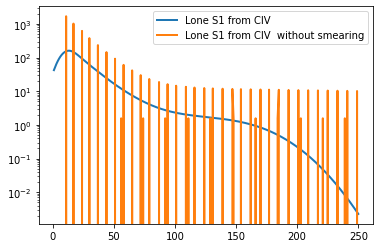

In [5]:
##Lone S1 from charge insensitive volume
S1only_FromCIV = np.linspace(1,maxS1Range,maxS1Range) #CIV = charge insensitive volume
Rq_CIV = []
for x in S1only_FromCIV:
    Rq_CIV.append(0.0)
    
def FillCIV(x, R):
    PE = 0
    for i in S1only_FromCIV:
        #print('i is',i)
        if (abs(i-x) < 1):
            PE = int(i) 
            break
    if (PE > 1):  #Otherwise, the number of PE created is out of range of the histogram
        Rq_CIV[PE] = Rq_CIV[PE] + R 
for x in x_bg_l:
    if x < binwidth:
        continue
    a, b = detector.EnergyToQuanta(x,"ER")
    FillCIV(a+b, particleBackgrounds.BackgroundSpectrumFromCIV(x,"ER"))
    a, b = detector.EnergyToQuanta(x*2.,"NR")    
    FillCIV(a+b, particleBackgrounds.BackgroundSpectrumFromCIV(x,"NR"))

''' Now we apply a gaussian smearing to recreate the statistical fluctuations in the 
    number of quanta produced. This does not take the anti-correlation into account. '''    
R_LS1_ChargeIns = ACClasses.GaussianFilter1D(Rq_CIV, S1only_FromCIV, 1., maxS1Range, 1)

fig_bg3, ax_bg3 = plt.subplots()
ax_bg3.semilogy(S1only_FromCIV, R_LS1_ChargeIns, linewidth=2.0, label="Lone S1 from CIV") 
ax_bg3.semilogy(S1only_FromCIV, Rq_CIV, linewidth=2.0, label="Lone S1 from CIV  without smearing")
ax_bg3.legend()



Text(0.5, 1.0, 'Rate of lone S1 from rad. backgrounds in active volume and in CIV')

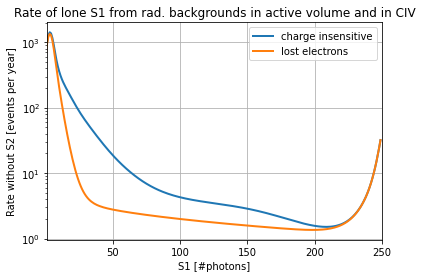

In [6]:
# Lone S1 from events where all e- are absorbed in active volume


R_LS1_Rad = []
R_LS1_RadChargeIns = [] # for the sum of the two components
x_LS1 = []
for i in range(len(R_forLS1)): # loop number of S1
    R_lost = 0.
    
    x_LS1.append(i)
    for j in range(len(R_forLS1[0])): #loop number of S2
        #Sample equally across length
        nsamples = 10
        for k in range(nsamples):
            R_lost = R_lost + R_forLS1[i,j]/nsamples*instrumentalBackgrounds.P_AllElectronsLost(j,k/nsamples * detector.MaxDriftTime)
    R_LS1_Rad.append(R_lost)
    R_LS1_RadChargeIns.append(R_lost+R_LS1_ChargeIns[i])
fig_noS2, ax_noS2 = plt.subplots()
ax_noS2.semilogy(x_LS1, R_LS1_RadChargeIns, linewidth=2.0, label="charge insensitive")
ax_noS2.semilogy(x_LS1, R_LS1_Rad, linewidth=2.0,  label="lost electrons")
ax_noS2.legend()
#ax_noS2.semilogy(x_LS1, R_LS1_ChargeIns, linewidth=2.0)
plt.xlim([1, 250])
ax_noS2.grid()
ax_noS2.set_xlabel("S1 [#photons]")
ax_noS2.set_ylabel("Rate without S2 [events per year]")
ax_noS2.set_title("Rate of lone S1 from rad. backgrounds in active volume and in CIV")     


In [7]:
# Turn the axis from 'quanta' to 'PE', and add DN

x_DN = np.linspace(1, 8, 8)
y_DNCoincidenceRate = instrumentalBackgrounds.DNCoincidenceRate(x_DN)

x_LS1_PE = []
R_LS1_FromCIV_PE = [] 
R_LS1_Rad_PE = [] 


# Apply g1; axis is in PE after this
# In principle, we also have to think about coincidences between DC pile-up and real light,
# but as long as the rates are this low, the chance of that is negligible
for i in range(1,round(len(R_LS1_Rad)*detector.g1)):
    R_LS1_FromCIV_PE.append(R_LS1_ChargeIns[round(i/detector.g1)])
    R_LS1_Rad_PE.append(R_LS1_Rad[round(i/detector.g1)])
    x_LS1_PE.append(i)


Text(0.5, 1.0, 'Rate of S2 from rad. backgrounds in active volume without S1')

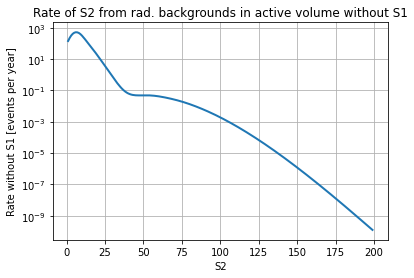

In [9]:
# Lone-S2  
#S1_2, S2_2, R_2, intrinsic only, since ext. events will be rejected from x-y position reconstruction based on S2 position
R_LS2 = []
x_LS2 = []
for j in range(1,len(R_forLS2[0])): # loop number of S2
    R_lost = 0.
    x_LS2.append(j)
    for i in range(1,len(R_forLS2)): #loop number of S1
        R_lost = R_lost + R_forLS2[i,j]*instrumentalBackgrounds.P_AllPhotonsLost(i,detector.height/2.) #Fixme, for now, all events produced in the center
    R_LS2.append(R_lost)
fig_noS1, ax_noS1 = plt.subplots()
ax_noS1.semilogy(x_LS2[0:100], R_LS2[0:100], linewidth=2.0)
ax_noS1.grid()
ax_noS1.set_xlabel("S2")
ax_noS1.set_ylabel("Rate without S1 [events per year]")
ax_noS1.set_title("Rate of S2 from rad. backgrounds in active volume without S1")

Text(0.5, 1.0, 'Total lone-S2')

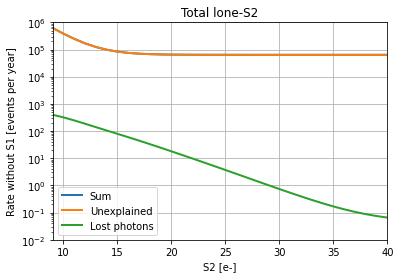

In [9]:
#Add lone-S2 unexplained
R_LS2_all = []
R_LS2_unexpl = []
for n in range(len(x_LS2)):
    Runexplained = instrumentalBackgrounds.RUnexplainedS2(n)
    #Runexplained=0
    R_LS2_unexpl.append(Runexplained)
    R_LS2_all.append( R_LS2[n] + Runexplained) 
fig_noS1tot, ax_noS1tot = plt.subplots()
ax_noS1tot.semilogy(x_LS2[0:100], R_LS2_all[0:100], linewidth=2.0, label="Sum")
ax_noS1tot.semilogy(x_LS2[0:100], R_LS2_unexpl[0:100], linewidth=2.0, label="Unexplained")
ax_noS1tot.semilogy(x_LS2[0:100], R_LS2[0:100], linewidth=2.0, label="Lost photons")
ax_noS1tot.grid()
ax_noS1tot.legend()
plt.xlim([9, 40])
plt.ylim([1e-2, 1e6])
ax_noS1tot.set_xlabel("S2 [e-]")
ax_noS1tot.set_ylabel("Rate without S1 [events per year]")
ax_noS1tot.set_title("Total lone-S2")


0: 1, 5518000239550.163
1: 2, 210647170034.822
2: 3, 4020976839.150104
3: 4, 51498622.17586487


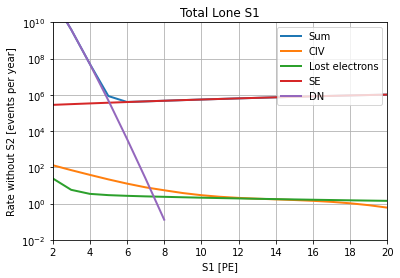

In [10]:
#Now add misclassified SE to S1 rate. 
# Single electrons are amplified given the SEgain.
# The SE gain spectrum is quite wide, so some fraction of them shows up at 
# much lower PE than they should and can be misclassified as an S1 with some probability.
R_LS1_all = []
R_LS1_SE = []

#x_DN = np.linspace(1, 8, 8)
#y_DNCoincidenceRate 

#x_LS1_PE = []
#R_LS1_FromCIV_PE = [] 
#R_LS1_Rad_PE = [] 


if (x_LS2[0] != 1):
    print ("Problem!")
    
SErate = R_LS2_all[0]*instrumentalBackgrounds.S1MisclassificationProb
for i in range(len(x_LS1_PE)):
    R_LS1_SE.append(0)
    R_LS1_all.append(0)
   # print(str(i) + ", " + str(x_LS1_PE[i]))
    R_LS1_SE[i] = SErate*instrumentalBackgrounds.SESpectrum(x_LS1_PE[i])
    R_LS1_all[i] = R_LS1_SE[i] + R_LS1_FromCIV_PE[i] + R_LS1_Rad_PE[i]
    
    if i < len(y_DNCoincidenceRate):
        R_LS1_all[i] = R_LS1_all[i] + y_DNCoincidenceRate[i]


fig_noS2total, ax_noS2total = plt.subplots()
ax_noS2total.semilogy(x_LS1_PE, R_LS1_all, linewidth=2.0, label="Sum")
ax_noS2total.semilogy(x_LS1_PE, R_LS1_FromCIV_PE, linewidth=2.0, label="CIV")
ax_noS2total.semilogy(x_LS1_PE, R_LS1_Rad_PE, linewidth=2.0, label="Lost electrons")
ax_noS2total.semilogy(x_LS1_PE, R_LS1_SE, linewidth=2.0, label="SE")
ax_noS2total.semilogy(x_DN, y_DNCoincidenceRate, linewidth=2.0, label="DN")
ax_noS2total.grid()
plt.xlim([2, 20])
plt.ylim([1e-2, 1e10])
ax_noS2total.legend(loc='upper right')
ax_noS2total.set_xlabel("S1 [PE]")
ax_noS2total.set_ylabel("Rate without S2 [events per year]")
ax_noS2total.set_title("Total Lone S1")   
for i in range(4):
    print (str(i) + ": " + str(x_LS1_PE[i]) + ", " + str(R_LS1_all[i]))

/project/atlas/Users/pkharban/AC_backgrounds_pdfs/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


rate in red box is 10350.8908 events/year


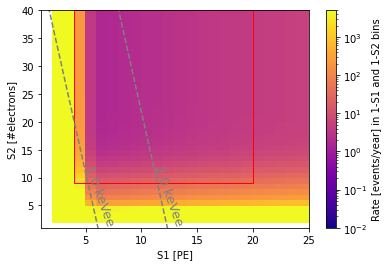

In [11]:
# Mixing them up
## 
## Lone-S1: x_LS1_PE, R_LS1_all
## Lone-S2: x_LS2, R_LS2_all
X_mix, Y_mix = np.meshgrid(x_LS1_PE, x_LS2)
Z_ACPDF = np.eye(len(x_LS2),len(x_LS1_PE))

for i in range(len(R_LS1_all)):
    for j in range(len(R_LS2_all)):
        if (i ==0 or j==0):Z_ACPDF[j,i] = 0.0
        else: Z_ACPDF[j,i] =  R_LS1_all[i]*R_LS2_all[j]*detector.MaxDriftTime*1./ACClasses.SecondsPerYear*1e-9
        #note inverted "i,j" due to weird axis definitions in np.meshgrid
        
        
def get_eq_energy(en, g1=detector.g1, g2=1, W=18e-3):
    cs1_max = en/W*g1
    cs1_ = np.linspace(0, 20, 501)
    cs2_ = g2*(en/W - cs1_/g1)
    return (cs1_, cs2_,cs1_max)
ens = [1., 2.] 
yrange=(1,300)
#plt.yscale("log")



fig_mix, ax_mix = plt.subplots()
levels = np.ndarray((5,), buffer=np.array([1e-10, 1e-8, 1e-6, 1e-4, 1e-2]))
plt.xlim([1, 25])
plt.ylim([1, 40])
im = ax_mix.pcolormesh(X_mix, Y_mix,  Z_ACPDF, norm=colors.LogNorm(vmin=1e-2, vmax=5e3), cmap='plasma')
ax_mix.set_ylabel("S2 [#electrons]")
ax_mix.set_xlabel("S1 [PE]")
for en in ens:
    l_ = get_eq_energy(en)
    ax_mix.plot(l_[0],l_[1], c="0.5", ls ="--")
    ax_mix.text(l_[2], yrange[0]*1.03, "{:0.1f} keVee".format(en),fontsize=13, rotation=290,
                va="bottom", ha="center", color="0.5")
#plt.xticks(np.arange(0, 20, 2))
#plt.yticks(np.arange(0, 40, 2))
ax_mix.set_title("")
fig_mix.colorbar(im, ax=ax_mix, label="Rate [events/year] in 1-S1 and 1-S2 bins")

#calculate rate in a box
xmin = 4
xmax = 20
ymin = 9
ymax = 40
rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='r', facecolor='none')
ax_mix.add_patch(rect)
totalrate = 0.0
for i in range(len(X_mix[0])):
    for j in range(len(Y_mix[1])):
        if (X_mix[0][i] >= xmin and X_mix[0][i] < xmax):
            if (Y_mix[j,i] >= ymin and Y_mix[j,i] < ymax):
                #print("x:" + str (X_mix[0][i]) + ", y:" + str(Y_mix[j,i]) + " :" + str(Z_mix[j,i]))
                totalrate = totalrate + Z_ACPDF[j,i]

print("rate in red box is " + "{:.4f}".format(totalrate) + " events/year")
plt.savefig("AC_S1S2.pdf", format="pdf",bbox_inches="tight")
np.savetxt("test.txt",Z_ACPDF)

In [12]:
#fixme. z-dependent corrections
# 1) translate #e- -> PE
# S1/S2 identification threshold is in uncorrected data in S1, S2
# 2) apply correction, at first order due to LCE as function of Z
# In Xe, LCE is normalized to center of TPC. At this point, could add S2-width cut
